<a href="https://colab.research.google.com/github/Joocheol/Financial-Engineering/blob/master/Deep_Hedging_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

# Black-Scholes formula

In [2]:
S0 = 100
K = 95
T = 30/365
r = 0.00
sig = 0.2

In [3]:
def bscall(S, K, T, r, sig):
    d1 = (np.log(S/K) + (r+0.5*sig**2)*T)/(sig*np.sqrt(T))
    d2 = (np.log(S/K) + (r-0.5*sig**2)*T)/(sig*np.sqrt(T))

    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [4]:
bscall(S0,K,T,r,sig)

5.5667338286016985

# Stock price simulation

In [5]:
r = 0.00
sig = 0.2
T = 30/365
N = 30
M = 100

dt = T/N
rdt = r*dt
sigsdt = sig * np.sqrt(dt) 

In [6]:
S0 = 100

S = np.empty([M,N+1])
rv = np.random.normal(r*dt,sigsdt,[M,N])

for i in range(M):
    S[i,0] = S0
    for j in range(N):
        S[i,j+1] = S[i,j] * (1+rv[i,j])

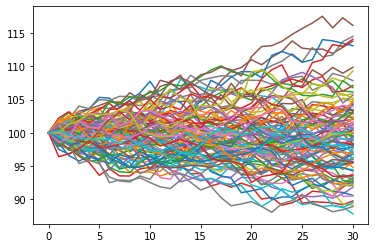

In [7]:
for i in range(M):
    plt.plot(S[i,:])

plt.show()

# Delta hedging - 1

formula

$(\Delta_0 - 0) S_0 + (\Delta_1 - \Delta_0) S_1 + (\Delta_2 - \Delta_1) S_{2} + \cdots + (\Delta_{T-1} - \Delta_{T-2}) S_{T-1}+ (\Delta_{T} - \Delta_{T-1}) S_T$

In [8]:
scenario = 2
K = 95

hedge = 0
cost = 0
for j in range(N):
    d1 = (np.log(S[scenario,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
    delta = norm.cdf(d1)
    cost = cost + (delta-hedge) * S[scenario,j]
    hedge = delta
    print("{0:6.2f} {1:6.3f} {2:7.3f}".format(S[scenario,j], delta, cost))

if S[scenario,N] > K:
    delta = 1
    cost = cost + (delta-hedge) * S[scenario,N] - K
else:
    delta = 0
    cost = cost + (delta-hedge) * S[scenario,N] 
    
print(S[scenario,N], cost)

100.00  0.822  82.206
 99.40  0.797  79.728
100.72  0.861  86.116
100.18  0.842  84.269
 99.82  0.830  83.038
 99.88  0.837  83.762
 99.55  0.826  82.642
101.46  0.909  91.096
100.51  0.880  88.146
 99.81  0.854  85.588
100.05  0.871  87.256
 99.06  0.827  82.879
 98.51  0.799  80.168
 98.97  0.834  83.613
 99.95  0.891  89.341
 99.15  0.859  86.118
 97.80  0.776  78.070
 96.61  0.679  68.665
 96.66  0.690  69.679
 96.00  0.625  63.514
 95.35  0.550  56.348
 95.10  0.520  53.488
 94.64  0.455  47.360
 94.04  0.362  38.537
 93.70  0.299  32.699
 93.01  0.186  22.182
 91.56  0.040   8.798
 92.24  0.053  10.007
 92.79  0.057  10.345
 93.62  0.083  12.761
93.2806620551727 5.061859475058314


$(\Delta_0 - 0) S_0 + (\Delta_1 - \Delta_0) S_1 + (\Delta_2 - \Delta_1) S_{2} + \cdots + (\Delta_{T-1} - \Delta_{T-2}) S_{T-1}+ (\Delta_{T} - \Delta_{T-1}) S_T$

$\Delta_0 (S_0 - S_1) + \Delta_1 (S_1 - S_2) + \cdots +  \Delta_{T-1} (S_{T-1} - S_T) + \Delta_T S_T $

In [9]:
K = 95
a = []

for i in range(M):
    hedge = 0 # no need
    cost = 0
    for j in range(N):
        d1 = (np.log(S[i,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)
        cost = cost + delta * (S[i,j] - S[i,j+1])
        hedge = delta # no need

    
    #a.append(-cost-np.maximum(S[i,N]-K, 0))
    a.append(-cost)
   


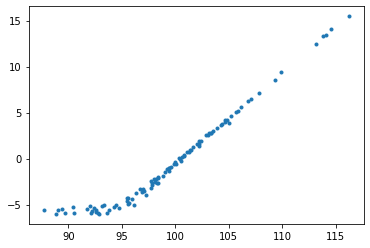

In [10]:
plt.plot(S[:,-1],a,linestyle='none',marker=".")

# Approximating Delta

In [11]:
S_list = [90, 100, 110]
K_list = [90, 100, 110]
T_list = [30/365, 20/365, 10/365]
sig_list = [0.1, 0.2, 0.3]

r = 0.0
sig = 0.2

import pandas as pd

x = []
for i in S_list:
    for j in K_list:
        for k in T_list:
            delta = norm.cdf((np.log(i/j) + (r+0.5*sig**2) * k)/(sig*np.sqrt(k)))
            x.append([i,j,k, delta])

df = pd.DataFrame(x, columns=['S', 'K', 'T', 'delta'])
df

,S,K,T,delta
0,90,90,0.082192,5.114358e-01
1,90,90,0.054795,5.093377e-01
2,90,90,0.027397,5.066030e-01
3,90,100,0.082192,3.523655e-02
4,90,100,0.054795,1.297052e-02
5,90,100,0.027397,7.723881e-04
6,90,110,0.082192,2.591626e-04
7,90,110,0.054795,1.008865e-05
8,90,110,0.027397,7.459805e-10
9,100,90,0.082192,9.689930e-01


In [12]:
import tensorflow as tf

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(3,)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               512       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21,185
Trainable params: 21,185
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='mse')

In [15]:
x = np.array(df[['S', 'K', 'T']])
y = np.array(df[['delta']])

In [16]:
model.fit(x=x, y=y, epochs=1000, verbose=False)

In [17]:
model.predict([[100,90,30/365]])

array([[0.9822742]], dtype=float32)

In [18]:
norm.cdf((np.log(100/90) + (0+0.5*sig**2) * (30/365))/(sig*np.sqrt(30/365)))

0.968993023749295

# Deep hedging



```
K = 95

a = []
for i in range(M):
    cost = 0
    for j in range(N):
        d1 = (np.log(S[i,j]/K)+(r+0.5*sig**2)*(T-j*dt))/(sig*np.sqrt(T-j*dt))
        delta = norm.cdf(d1)
        cost = cost + delta * (S[i,j] - S[i,j+1])
          
    a.append(-cost)
```



In [19]:
my_input = []

premium = tf.keras.layers.Input(shape=(1,), name="premium")
my_input = my_input + [premium]

hedge_cost = tf.keras.layers.Input(shape=(1,), name='hedge_cost')
my_input = my_input + [hedge_cost]

price = tf.keras.layers.Input(shape=(1,), name="price")
my_input = my_input + [price]

for j in range(N):
    
    delta = tf.keras.layers.Dense(32, activation='tanh')(price)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(32, activation='relu')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(32, activation='tanh')(delta)
    delta = tf.keras.layers.BatchNormalization()(delta)
    delta = tf.keras.layers.Dense(1, activation='sigmoid')(delta)

    new_price = tf.keras.layers.Input(shape=(1,), name='S'+str(j))
    my_input = my_input + [new_price]


    price_inc = tf.keras.layers.Subtract(name='price_inc_'+str(j))([price, new_price])
    cost = tf.keras.layers.Multiply(name="multiply_"+str(j))([delta, price_inc])
    hedge_cost = tf.keras.layers.Add(name='cost_'+str(j))([hedge_cost, cost])
    price = new_price

payoff = tf.keras.layers.Lambda(lambda x : tf.math.maximum(x-K, 0))(price)
cum_cost = tf.keras.layers.Add(name="final")([hedge_cost, payoff])
cum_cost = tf.keras.layers.Subtract(name="final_")([cum_cost, premium])

model = tf.keras.Model(inputs=my_input, outputs=cum_cost)


In [20]:
S0 = 100
K = 95
T = 30/365
r = 0.0
sig = 0.2

p = bscall(S0,K,T,r,sig) * np.ones([M,1])
c = np.zeros([M,1])
SS = [S[:,i].reshape(M,1) for i in range(N+1)]

x = [p]+[c]+[SS]
y = bscall(S0,K,T,r,sig) * np.zeros([M,1])

In [21]:
model.compile(loss='mse', optimizer='adam')

In [22]:
model.fit(x,y, batch_size=128, epochs=1000, verbose=False)

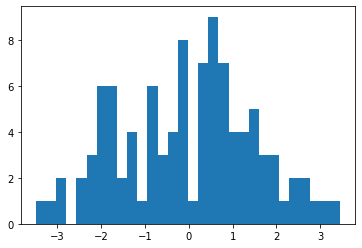

In [23]:
plt.hist(model.predict(x), bins=30)
plt.show()

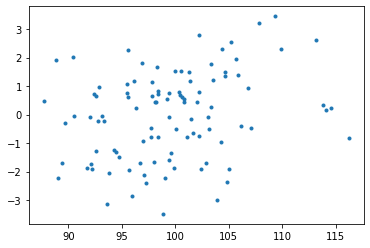

In [24]:
plt.plot(S[:,-1],model.predict(x), linestyle = "none", marker = ".")